# WeatherPy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
import os
import sys
import random
from scipy.stats import linregress
from scipy.stats import normaltest
from citipy import citipy
import json

module_path = os.path.abspath(os.path.join('..'))
#Include api directory in path
if module_path not in sys.path:
    sys.path.append(module_path + "\\api")

# Import API key
from api_keys import weather_api_key

weather_key = weather_api_key

weather_base_url = "http://api.openweathermap.org/data/2.5/weather?"


# Output File (CSV)

output_data_file = "../output_data/"

current_date = date.today().strftime("%m/%d/%Y")


print(weather_api_key)

39b4c8c3c2107953741b12b2cc76dd00


## Genereate Random Cities

In [2]:
# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy

#Create function for resuse in case ever wanting to create sample cities in future.
def gen_rand_cities(dict):
    coord_list = []
    min_lat = dict["lat_min"]
    max_lat = dict["lat_max"]
    min_long = dict["long_min"]
    max_long = dict["long_max"]
    samp_size = dict["samp_size"]
    x = 0
    city = []
    country = []
    while x < samp_size:
 
        lat_rand = min_lat + (max_lat - min_lat) * random.random()
        long_rand = min_long + (max_long - min_long) * random.random() 
        city_obj = citipy.nearest_city(lat_rand, long_rand) 
        #Don't duplicate city names
        if city_obj.city_name not in city:                  
            city.append(city_obj.city_name)
            country.append(city_obj.country_code)
            #print(f"{x} {city_obj.city_name} {city_obj.country_code}")
            x = x + 1
            
              
    funct_df = pd.DataFrame ( {
                              "city": city,
                              "country":country,             
                             })
    return(funct_df)

#Set dictionary to pass into function that will generate city list by 
#lattitude/longitude ranges
city_geo_params = {"lat_min":-90,
                   "lat_max":90,
                   "long_min":-180,
                   "long_max":180,
                   "samp_size":500};



city_df = gen_rand_cities(city_geo_params)     

len(city_df)







500

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Initialize cities that will create data frame
cities = []
countries = []
lattitudes = []
longitudes = []
max_temps = []
humidities = []
cloudiness = []
windspeeds = []
countries = []
dates = []


#User itterrows to loop through data frame
for index, row in city_df.iterrows():
    city = row['city']
    country = row['country'].upper()
    params = {"appid": weather_key, "q": city + ',' + country, "units":"imperial"}
    #Exception block to handle when city can't be found.
    try:
        response = requests.get(weather_base_url,params=params).json()
        lattitudes.append(response["coord"]["lat"])
        longitudes.append(response["coord"]["lon"])
        max_temps.append(response["main"]["temp_max"])
        humidities.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeeds.append(response["wind"]["speed"])
        countries.append(country)
        cities.append(city)
        dates.append(response["dt"])
        print(f'{index}- {city} ({response["coord"]["lat"]}:{response["coord"]["lon"]})')                              
    except:
        print(f'{city} ({country}) Not Found')





0- kodiak (57.79:-152.4072)
amderma (RU) Not Found
2- muros (42.7762:-9.0603)
3- cayenne (4.9333:-52.3333)
4- ushuaia (-54.8:-68.3)
5- cape town (-33.9258:18.4232)
mataura (PF) Not Found
7- lokoja (7.8024:6.743)
8- diu (20.7141:70.9822)
9- saint-philippe (-21.3585:55.7679)
10- grand gaube (-20.0064:57.6608)
11- touros (-5.1989:-35.4608)
12- koslan (63.4564:48.8989)
13- busselton (-33.65:115.3333)
14- broken hill (-31.95:141.4333)
15- bredasdorp (-34.5322:20.0403)
16- hobart (-42.8794:147.3294)
17- georgetown (-7.9333:-14.4167)
18- tilichiki (60.4667:166.1)
19- ribeira grande (38.5167:-28.7)
20- yerbogachen (61.2767:108.0108)
21- riviera beach (26.7753:-80.0581)
22- verkhnyaya inta (65.9811:60.3094)
23- kapaa (22.0752:-159.319)
asau (TV) Not Found
25- constitucion (23.9912:-104.6749)
26- simplicio mendes (-7.8539:-41.9103)
27- noumea (-22.2763:166.4572)
28- margate (-30.8636:30.3705)
oia (GR) Not Found
30- palmer (42.1584:-72.3287)
31- ponta do sol (17.1994:-25.0919)
32- khatanga (71.96

264- omagari (39.45:140.4833)
265- guerrero negro (27.9769:-114.0611)
266- geraldton (49.7267:-86.9484)
267- polunochnoye (60.8697:60.4153)
268- tasiilaq (65.6145:-37.6368)
269- fonte boa (-2.4959:-66.2662)
270- makarska (43.2969:17.0178)
271- roald (62.5833:6.1333)
lata (SB) Not Found
273- tessalit (20.1986:1.0114)
274- hoquiam (46.9809:-123.8893)
275- riyadh (24.6877:46.7219)
tabukiniberu (KI) Not Found
277- haines junction (60.7522:-137.5108)
278- tuktoyaktuk (69.4541:-133.0374)
279- olafsvik (64.8945:-23.7142)
280- praya (-8.7054:116.2704)
281- toktogul (41.8708:72.9402)
umzimvubu (ZA) Not Found
283- kushiro (42.975:144.3747)
284- komsomolskiy (43.9783:46.6985)
285- novokayakent (42.3937:47.9861)
286- tamarindo (-4.8781:-80.9758)
287- camalu (30.85:-116.0667)
el badari (EG) Not Found
289- cambrils (41.0748:1.0524)
290- el cristo (8.25:-80.6167)
291- gualaquiza (-3.4:-78.55)
292- chuy (-33.6971:-53.4616)
293- boyolangu (-8.1181:111.8935)
294- poum (-20.2333:164.0167)
295- havelock (

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame



In [4]:
city_api_df = pd.DataFrame(
                            {"City": cities,
                             "Lat" : lattitudes,
                             "Lng" : longitudes,
                             "Max Temp":max_temps,
                             "Humidity": humidities,
                             "Cloudiness": cloudiness,
                             "Wind Speed": windspeeds,
                             "Country":countries,
                             "Date": dates
                             })


In [5]:

city_api_df.to_csv(output_data_file + "cities.csv")
city_api_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,4.410000e+02
mean,19.879887,15.578136,48.893379,73.863946,57.253968,8.888571,1.612149e+09
std,33.663949,93.178671,34.064790,18.915712,40.285728,6.541311,8.549327e+01
min,-54.800000,-179.166700,-47.070000,17.000000,0.000000,0.340000,1.612148e+09
25%,-7.933300,-67.185600,26.600000,64.000000,12.000000,3.620000,1.612149e+09
50%,20.785000,21.850000,62.010000,78.000000,75.000000,7.780000,1.612149e+09
75%,50.100100,102.500000,76.410000,87.000000,97.000000,11.740000,1.612149e+09
max,78.218600,179.316700,100.400000,100.000000,100.000000,41.270000,1.612149e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
clean_city_data = city_api_df.loc[city_api_df["Humidity"] < 100 ]
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,4.320000e+02
mean,19.813233,15.582374,48.748588,73.319444,57.256944,8.874537,1.612149e+09
std,33.753738,93.816035,34.265768,18.727371,40.451870,6.503475,8.522808e+01
min,-54.800000,-179.166700,-47.070000,17.000000,0.000000,0.340000,1.612148e+09
25%,-7.934625,-68.726675,26.362500,64.000000,10.500000,3.615000,1.612149e+09
50%,20.749550,22.002350,61.990000,78.000000,75.000000,7.795000,1.612149e+09
75%,50.103150,103.157075,76.282500,87.000000,97.000000,11.740000,1.612149e+09
max,78.218600,179.316700,100.400000,99.000000,100.000000,41.270000,1.612149e+09


In [7]:
k2, pval = normaltest(clean_city_data["Humidity"])

if pval < .05:
    print(f'P Value of Humdity is {pval} suggests data is not normally distributed about the mean.')
else:
    print(f'P Value of Humidity is {pval} suggests data is normally distributed about the mean.')

P Value of Humdity is 6.0690191311137126e-15 suggests data is not normally distributed about the mean.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

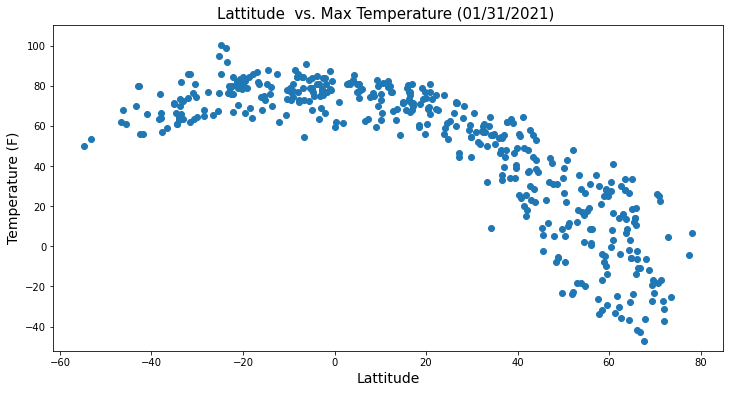

In [86]:
ax = plt
ax.figure(figsize=(12,6))
ylim_top = clean_city_data["Max Temp"].max() + 10
ylim_bottom = clean_city_data["Max Temp"].min() - 5
ax.scatter(x=clean_city_data["Lat"], y=clean_city_data["Max Temp"], marker='o')
ax.ylim(ylim_bottom,ylim_top)
ax.ylabel("Temperature (F)",fontsize=14)
ax.xlabel("Lattitude",fontsize=14)
ax.title(f"Lattitude  vs. Max Temperature ({current_date}) ",fontsize=15)
ax.plot()
ax.savefig(output_data_file + "lattitude_vs_max_temp.png")

## Latitude vs. Humidity Plot

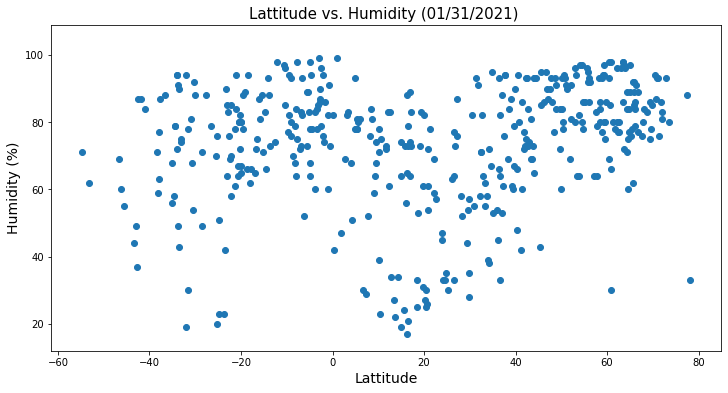

In [87]:
ax1 = plt
ax1.figure(figsize=(12,6))
ylim_top = clean_city_data["Humidity"].max() + 10
ylim_bottom = clean_city_data["Humidity"].min() - 5
x_vals = clean_city_data["Lat"]
y_vals = clean_city_data["Humidity"]
ax1.scatter(x=x_vals, y=y_vals, marker='o')
ax1.ylim(ylim_bottom,ylim_top)
ax1.ylabel("Humidity (%)",fontsize=14)
ax1.xlabel("Lattitude",fontsize=14)
ax1.title(f"Lattitude vs. Humidity ({current_date}) ",fontsize=15)
ax1.plot()
ax1.savefig(output_data_file + "lattitude_vs_humidity.png")

## Latitude vs. Cloudiness Plot

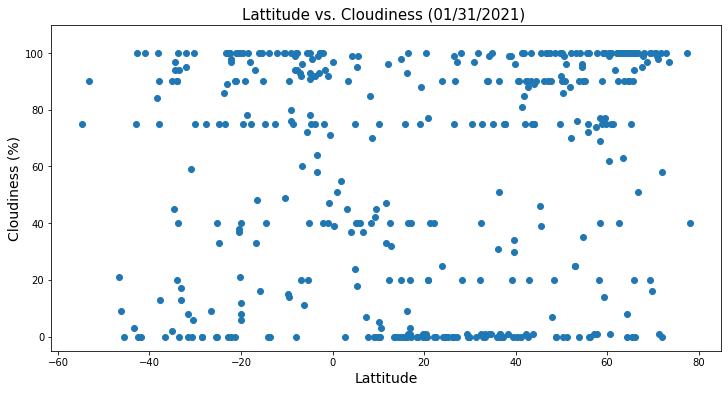

In [88]:
ax2 = plt
ax2.figure(figsize=(12,6))
ylim_top = clean_city_data["Cloudiness"].max() + 10
ylim_bottom = clean_city_data["Cloudiness"].min() - 5
ax2.scatter(x=clean_city_data["Lat"], y=clean_city_data["Cloudiness"], marker='o')
ax2.ylim(ylim_bottom,ylim_top)
ax2.ylabel("Cloudiness (%)",fontsize=14)
ax2.xlabel("Lattitude",fontsize=14)
ax2.title(f"Lattitude vs. Cloudiness ({current_date}) ",fontsize=15)
ax2.plot()
ax2.savefig(output_data_file + "lattitude_vs_cloudiness.png")

## Latitude vs. Wind Speed Plot

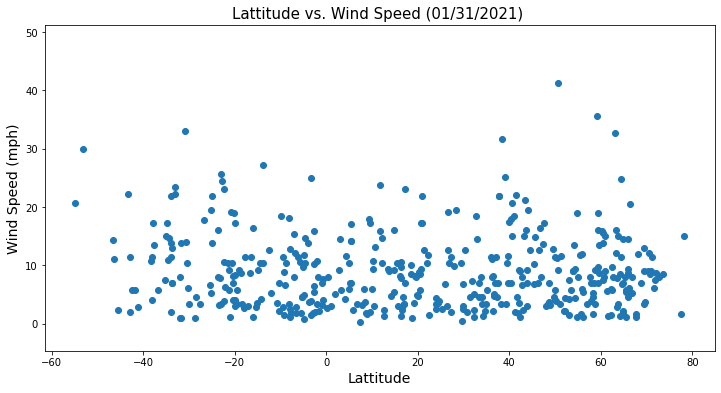

In [89]:
ax3 = plt
ax3.figure(figsize=(12,6))
ylim_top = clean_city_data["Wind Speed"].max() + 10
ylim_bottom = clean_city_data["Wind Speed"].min() - 5
ax3.scatter(x=clean_city_data["Lat"], y=clean_city_data["Wind Speed"], marker='o')
ax3.ylim(ylim_bottom,ylim_top)
ax3.ylabel("Wind Speed (mph)",fontsize=14)
ax3.xlabel("Lattitude",fontsize=14)
ax3.title(f"Lattitude vs. Wind Speed ({current_date}) ",fontsize=15)
ax3.plot()
ax3.savefig(output_data_file + "lattitude_vs_windspeed.png")

## Linear Regression

In [12]:
clean_city_northern_hem = clean_city_data[clean_city_data['Lat'] >= 0]
clean_city_southern_hem = clean_city_data[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.45x + 93.06


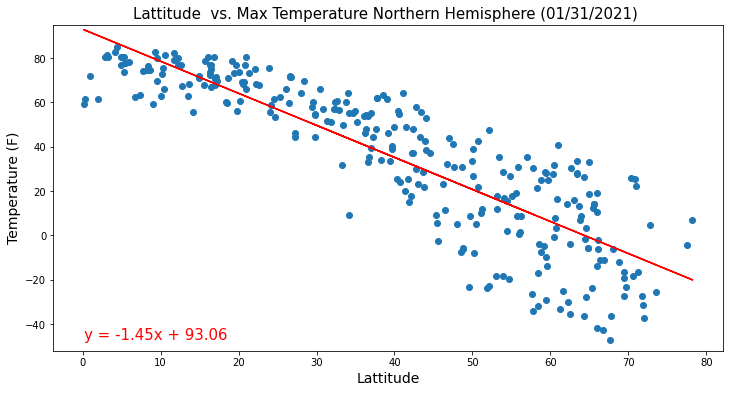

In [90]:
ax4 = plt
ax4.figure(figsize=(12,6))
ylim_top = clean_city_northern_hem["Max Temp"].max() + 10
ylim_bottom = clean_city_northern_hem["Max Temp"].min() - 5
xmin = clean_city_northern_hem["Lat"].min()
x_vals = clean_city_northern_hem["Lat"]
y_vals = clean_city_northern_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
line_formula = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}' 
print(line_formula)
ax4.scatter(x=x_vals, y=y_vals, marker='o')
ax4.ylim(ylim_bottom,ylim_top)
ax4.ylabel("Temperature (F)",fontsize=14)
ax4.xlabel("Lattitude",fontsize=14)
ax4.title(f"Lattitude  vs. Max Temperature Northern Hemisphere ({current_date}) ",fontsize=15)
regress_values = x_vals * slope + intercept
plt.plot(x_vals,regress_values,"r-")
plt.annotate(line_formula,(xmin,ylim_bottom + 5),fontsize=15,color="red")
ax4.plot()
ax4.savefig(output_data_file + "lattitude_vs_max_temp_northern_hemisphere.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.31x + 81.39


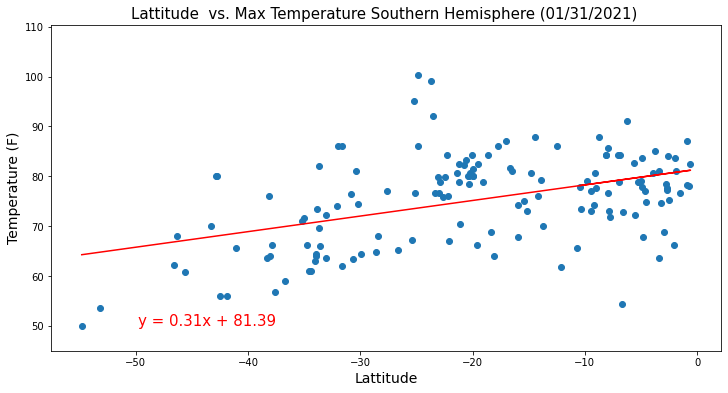

In [91]:
ax5 = plt
ax5.figure(figsize=(12,6))
line1 = plt
ylim_top = clean_city_southern_hem["Max Temp"].max() + 10
ylim_bottom = clean_city_southern_hem["Max Temp"].min() - 5
xmin = clean_city_southern_hem["Lat"].min()
x_vals = clean_city_southern_hem["Lat"]
y_vals = clean_city_southern_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
line_formula = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
regress_values = x_vals * slope + intercept
print(line_formula)
ax5.scatter(x=x_vals, y=y_vals, marker='o')
ax5.ylim(ylim_bottom,ylim_top)
ax5.ylabel("Temperature (F)",fontsize=14)
ax5.xlabel("Lattitude",fontsize=14)
ax5.title(f"Lattitude  vs. Max Temperature Southern Hemisphere ({current_date}) ",fontsize=15)

line1.annotate(line_formula,xy=(xmin + 5,ylim_bottom + 5),fontsize=15,color="red")
line1.plot(x_vals,regress_values,"r-")

ax5.savefig(output_data_file + "lattitude_vs_max_temp_southern_hemisphere.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.45x + 54.8


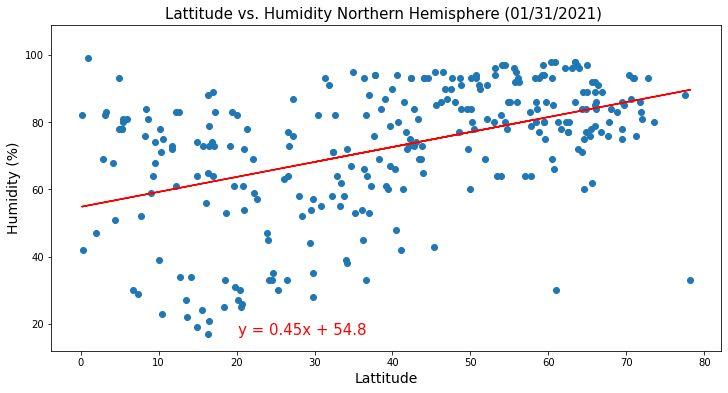

In [92]:
ax6 = plt
ax6.figure(figsize=(12,6))
ylim_top = clean_city_northern_hem["Humidity"].max() + 10
ylim_bottom = clean_city_northern_hem["Humidity"].min() - 5
xmin = clean_city_northern_hem["Lat"].min()
x_vals = clean_city_northern_hem["Lat"]
y_vals = clean_city_northern_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
line_formula = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}' 
regress_values = x_vals * slope + intercept
print(line_formula)
ax6.scatter(x=x_vals, y=y_vals, marker='o')
ax6.ylim(ylim_bottom,ylim_top)
ax6.ylabel("Humidity (%)",fontsize=14)
ax6.xlabel("Lattitude",fontsize=14)
ax6.title(f"Lattitude vs. Humidity Northern Hemisphere ({current_date}) ",fontsize=15)
ax6.plot()
plt.annotate(line_formula,xy=(xmin + 20,ylim_bottom + 5),fontsize=15,color="red")
plt.plot(x_vals,regress_values,"r-")
ax6.savefig(output_data_file + "lattitude_vs_humidity_northern_hemisphere.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.42x + 83.04


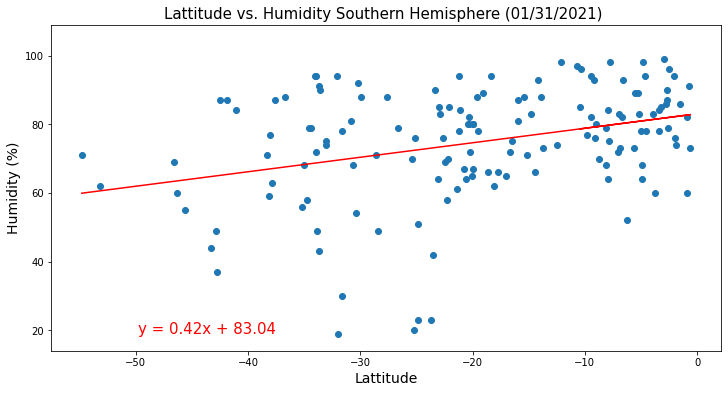

In [93]:
ax6 = plt
ax6.figure(figsize=(12,6))
ylim_top = clean_city_southern_hem["Humidity"].max() + 10
ylim_bottom = clean_city_southern_hem["Humidity"].min() - 5
xmin = clean_city_southern_hem["Lat"].min()
x_vals = clean_city_southern_hem["Lat"]
y_vals = clean_city_southern_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
line_formula = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}' 
regress_values = x_vals * slope + intercept
print(line_formula)
ax6.scatter(x=x_vals, y=y_vals, marker='o')
ax6.ylim(ylim_bottom,ylim_top)
ax6.ylabel("Humidity (%)",fontsize=14)
ax6.xlabel("Lattitude",fontsize=14)
ax6.title(f"Lattitude vs. Humidity Southern Hemisphere ({current_date}) ",fontsize=15)
ax6.plot()
plt.annotate(line_formula,xy=(xmin + 5,ylim_bottom + 5),fontsize=15,color="red")
plt.plot(x_vals,regress_values,"r-")
ax6.savefig(output_data_file + "lattitude_vs_humidity_southern_hemisphere.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.79x + 22.43


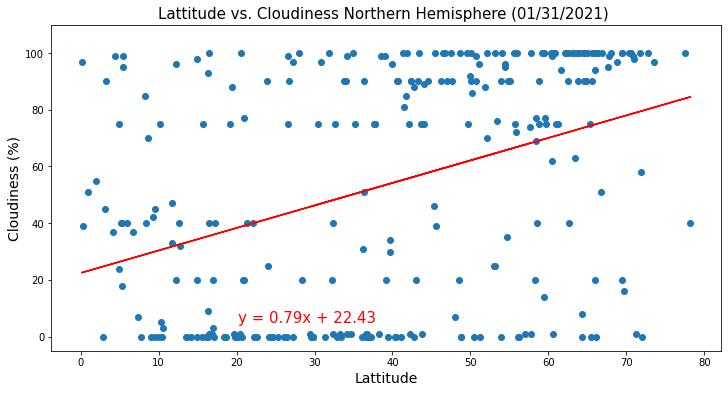

In [94]:
ax7 = plt
ax7.figure(figsize=(12,6))
ylim_top = clean_city_northern_hem["Cloudiness"].max() + 10
ylim_bottom = clean_city_northern_hem["Cloudiness"].min() - 5
xmin = clean_city_northern_hem["Lat"].min()
x_vals = clean_city_northern_hem["Lat"]
y_vals = clean_city_northern_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
line_formula = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}' 
regress_values = x_vals * slope + intercept
print(line_formula)
ax7.scatter(x=x_vals, y=y_vals, marker='o')
ax7.ylim(ylim_bottom,ylim_top)
ax7.ylabel("Cloudiness (%)",fontsize=14)
ax7.xlabel("Lattitude",fontsize=14)
ax7.title(f"Lattitude vs. Cloudiness Northern Hemisphere ({current_date}) ",fontsize=15)
ax7.plot()
plt.annotate(line_formula,xy=(xmin + 20,ylim_bottom + 10),fontsize=15,color="red")
plt.plot(x_vals,regress_values,"r-")
ax7.savefig(output_data_file + "lattitude_vs_cloudiness_northern_hemisphere.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.78x + 78.67


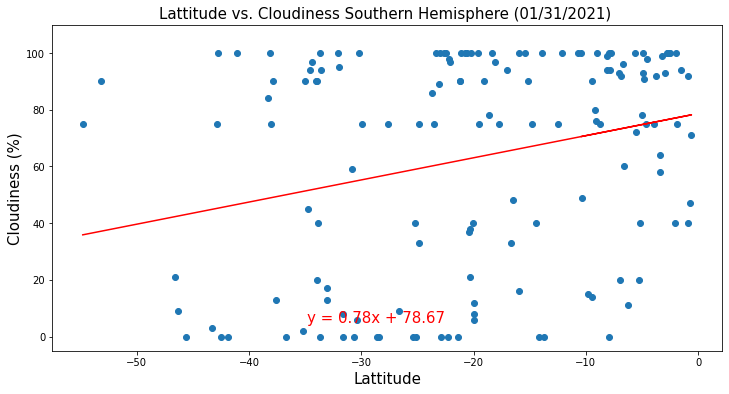

In [95]:
ax7 = plt
ax7.figure(figsize=(12,6))
ylim_top = clean_city_southern_hem["Cloudiness"].max() + 10
ylim_bottom = clean_city_southern_hem["Cloudiness"].min() - 5
xmin = clean_city_southern_hem["Lat"].min()
x_vals = clean_city_southern_hem["Lat"]
y_vals = clean_city_southern_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
line_formula = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}' 
regress_values = x_vals * slope + intercept
print(line_formula)
ax7.scatter(x=x_vals, y=y_vals, marker='o')
ax7.ylim(ylim_bottom,ylim_top)
ax7.ylabel("Cloudiness (%)",fontsize=15)
ax7.xlabel("Lattitude",fontsize=15)
ax7.title(f"Lattitude vs. Cloudiness Southern Hemisphere ({current_date}) ",fontsize=15)
ax7.plot()
plt.annotate(line_formula,xy=(xmin + 20,ylim_bottom + 10),fontsize=15,color="red")
plt.plot(x_vals,regress_values,"r-")
ax7.savefig(output_data_file + "lattitude_vs_cloudiness_southern_hemisphere.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.02x + 7.99


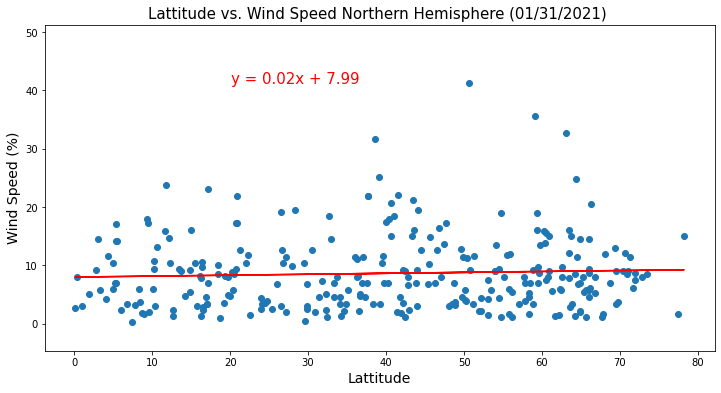

In [85]:
ax8 = plt
ax8.figure(figsize=(12,6))
ylim_top = clean_city_northern_hem["Wind Speed"].max() + 10
ylim_bottom = clean_city_northern_hem["Wind Speed"].min() - 5
xmin = clean_city_northern_hem["Lat"].min()
x_vals = clean_city_northern_hem["Lat"]
y_vals = clean_city_northern_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
line_formula = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}' 
regress_values = x_vals * slope + intercept
print(line_formula)
ax8.scatter(x=x_vals, y=y_vals, marker='o')
ax8.ylim(ylim_bottom,ylim_top)
ax8.ylabel("Wind Speed (%)",fontsize=14)
ax8.xlabel("Lattitude",fontsize=14)
ax8.title(f"Lattitude vs. Wind Speed Northern Hemisphere ({current_date}) ",fontsize=15)
ax8.plot()
plt.annotate(line_formula,xy=(xmin + 20,ylim_top - 10),fontsize=15,color="red")
plt.plot(x_vals,regress_values,"r-")
ax8.savefig(output_data_file + "lattitude_vs_windspeed_northern_hemisphere.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.14x + 6.6


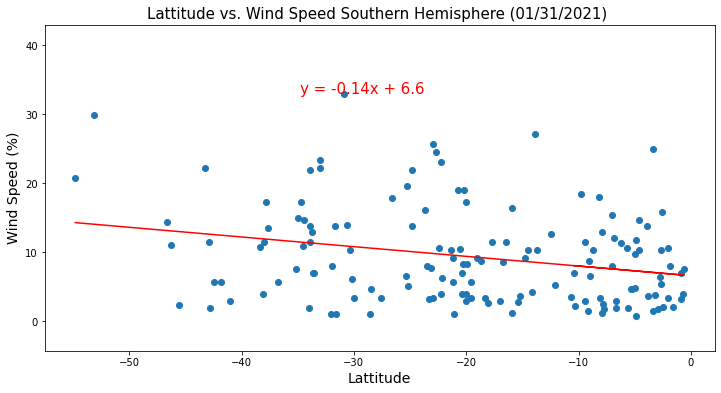

In [96]:
ax8 = plt
ax8.figure(figsize=(12,6))
ylim_top = clean_city_southern_hem["Wind Speed"].max() + 10
ylim_bottom = clean_city_southern_hem["Wind Speed"].min() - 5
xmin = clean_city_southern_hem["Lat"].min()
x_vals = clean_city_southern_hem["Lat"]
y_vals = clean_city_southern_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
line_formula = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}' 
regress_values = x_vals * slope + intercept
print(line_formula)
ax8.scatter(x=x_vals, y=y_vals, marker='o')
ax8.ylim(ylim_bottom,ylim_top)
ax8.ylabel("Wind Speed (%)",fontsize=14)
ax8.xlabel("Lattitude",fontsize=14)
ax8.title(f"Lattitude vs. Wind Speed Southern Hemisphere ({current_date}) ",fontsize=15)
ax8.plot()
plt.annotate(line_formula,xy=(xmin + 20,ylim_top - 10),fontsize=15,color="red")
plt.plot(x_vals,regress_values,"r-")
ax8.savefig(output_data_file + "lattitude_vs_windspeed_southern_hemisphere.png")
